In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv("Thyroid_Diff.csv")

In [22]:
X = dataset.drop("Recurred", axis=1)

In [23]:
y = dataset["Recurred"]

In [25]:
#print(dataset.isnull().sum())

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Risk', 'T', 'N', 'M', 'Stage', 'Response']
le = LabelEncoder()
for col in label_encode_cols:
    X[col] = le.fit_transform(X[col])

In [27]:
print(X)

     Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenop

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
assert isinstance(X, pd.DataFrame)
onehot_encode_cols = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy',
                      'Thyroid Function','Physical Examination','Adenopathy',
                      'Pathology','Focality']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='if_binary'), onehot_encode_cols)],
    remainder='passthrough'
)
X_transformed = ct.fit_transform(X)
# Get new column names
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(onehot_encode_cols)
remaining_cols = [col for col in X.columns if col not in onehot_encode_cols]
all_cols = list(encoded_cols) + remaining_cols

# Convert to DataFrame with proper column names
X_df = pd.DataFrame(X_transformed, columns=all_cols)

# Optionally, print first few rows
#print(X_df.head())

In [29]:
print(X_df)

     Gender_M  Smoking_Yes  Hx Smoking_Yes  Hx Radiothreapy_Yes  \
0         0.0          0.0             0.0                  0.0   
1         0.0          0.0             1.0                  0.0   
2         0.0          0.0             0.0                  0.0   
3         0.0          0.0             0.0                  0.0   
4         0.0          0.0             0.0                  0.0   
..        ...          ...             ...                  ...   
378       1.0          1.0             1.0                  1.0   
379       1.0          1.0             0.0                  1.0   
380       1.0          1.0             1.0                  0.0   
381       1.0          1.0             1.0                  1.0   
382       1.0          1.0             0.0                  0.0   

     Thyroid Function_Clinical Hyperthyroidism  \
0                                          0.0   
1                                          0.0   
2                                          0.

In [30]:
y_encoded = LabelEncoder().fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_encoded, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [33]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[48  3]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                  # Regularization type
    'solver': ['liblinear', 'saga']           # Solvers that support L1
}
# Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9215758857747224
LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.85      0.85      0.85        26

    accuracy                           0.90        77
   macro avg       0.88      0.88      0.88        77
weighted avg       0.90      0.90      0.90        77



In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average='weighted'))    
print('Recall is: ', recall_score(y_test, y_pred, average='weighted'))
print('F1-score is: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy is:  0.8961038961038961
Precision is:  0.8961038961038961
Recall is:  0.8961038961038961
F1-score is:  0.8961038961038961


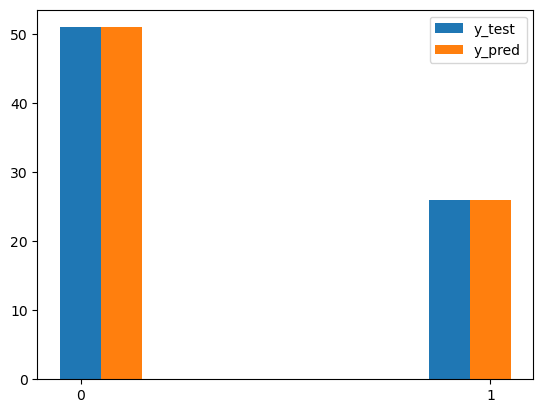

In [42]:
def plot_results(y_test, y_pred):
    fig = plt.figure()
    plt.hist(y_test, align='left')
    plt.hist(y_pred, align='right')
    plt.legend(['y_test', 'y_pred'])
    plt.xticks((0, 1))
    plt.show()
plot_results(y_test, y_pred)